<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-David-Nicolas364/blob/main/sep2/ejercicio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [21]:
houses=np.loadtxt("houses.txt",delimiter=',').T
Xh=houses[0:4]
th=houses[-1]
labels =["Tamaño", "# habitaciones","pisos", "Años"]

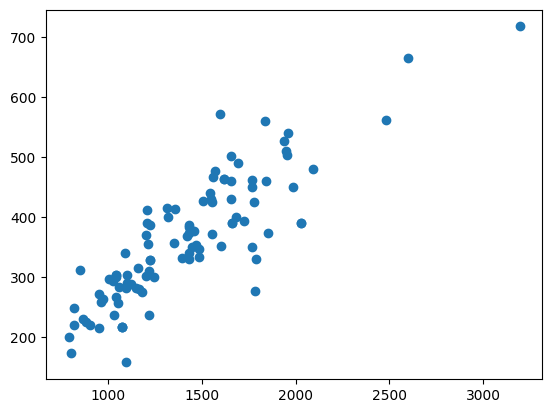

In [22]:
plt.scatter(Xh[0],th)

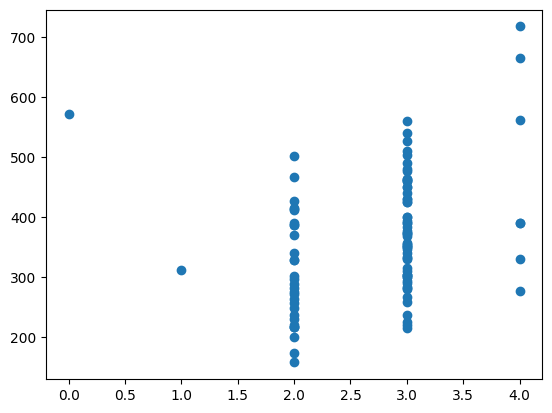

In [23]:
plt.scatter(Xh[1],th)

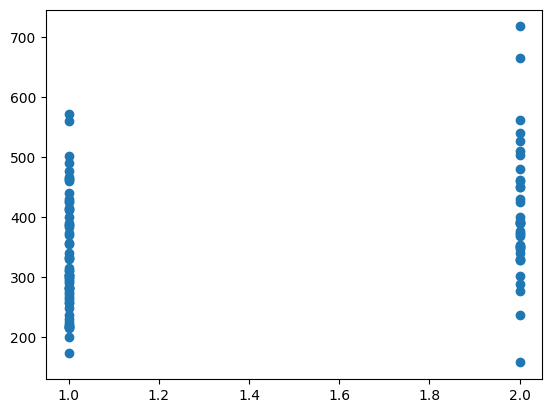

In [24]:
plt.scatter(Xh[2],th)

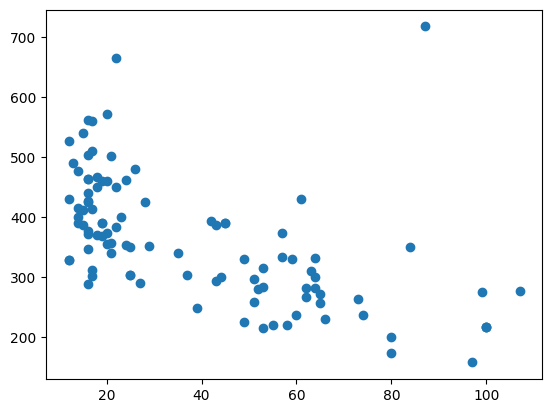

In [25]:
plt.scatter(Xh[3],th)

In [52]:
#Función costo
def L(x,y,w):
  f = w[0] + w[1]*x[0,:] + w[2]*x[1,:] + w[3]*x[2,:]+w[4]*x[3,:]
  costo= np.sum((f-y)**2)
  costo/=(2*len(x[0,:]))
  return costo

In [82]:
#derivada
def D(x,y,w):
  dw = np.zeros(len(w))
  f=0
  for i in range(len(w)):
    if i== 0:
      f = w[0]
    else:
      f += w[i]*x[i-1,:]
  for j in range(len(w)):
    if i== 0:
      dw[0] = np.sum((f-y))/len(x)
    else:
      dw[j] = np.sum((f-y)*x[j-1,:])/len(x)
  return dw

In [149]:
#método gradiente descendiente
def graddec(x,y,w,alph,iter,V,D):
  cost=[]
  for i in range(iter):
    dj=D(x,y,w)
    for j in range(len(w)):
      w[j] = w[j]-alph*dj[j]
    cost.append(V(x,y,w))
  return w, cost

In [241]:
w=[0.,0.,0.,0.,0.]
iteraciones = 200000
alph=1e-12
wf, cost=graddec(Xh,th,w, alph, iteraciones, L,D)
wf

[0.002785309039882512,
 0.2530242548421864,
 0.000432355223595086,
 0.00020059989035215906,
 0.002785309039882512]

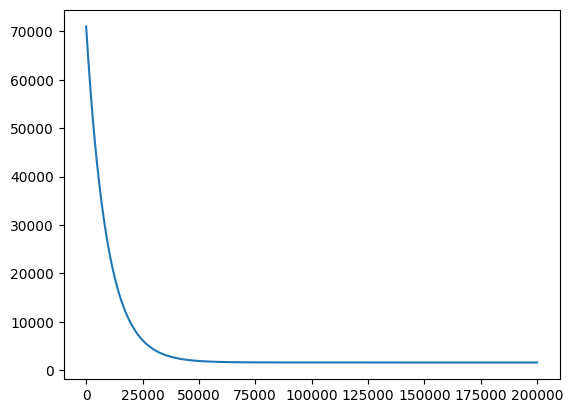

In [242]:
#Gráfica costo
plt.plot(range(iteraciones),cost)

(1500.0, 1600.0)

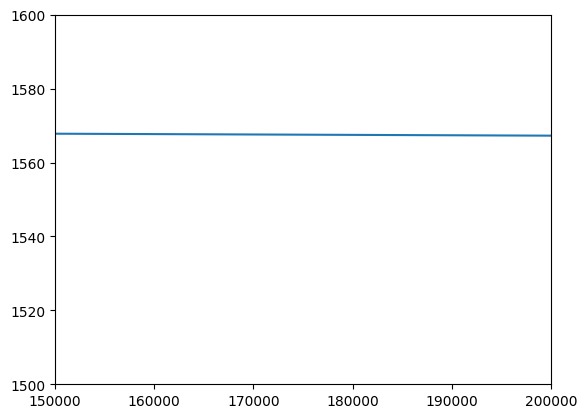

In [243]:
#Gráfica costo reducida
plt.plot(range(iteraciones),cost)
plt.xlim([150000,200000])
plt.ylim([1500,1600])

In [190]:
tPred = wf[0] + wf[1]*Xh[0,:] + wf[2]*Xh[1,:] + wf[3]*Xh[2,:]+wf[4]*Xh[3,:]

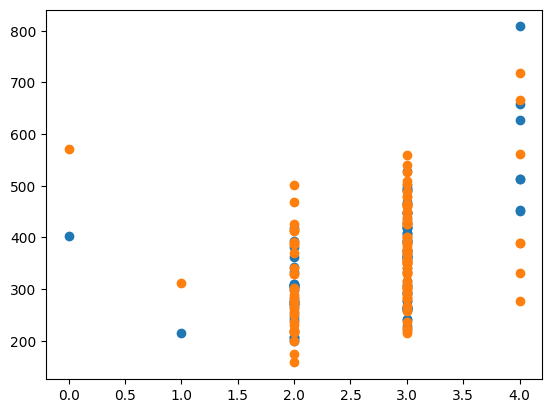

In [195]:
plt.scatter(Xh[1,:],tPred)
plt.scatter(Xh[1,:],th)

In [206]:
XNorm0=(Xh[0,:]-np.mean(Xh[0,:]))/np.std(Xh[0,:])
XNorm1=(Xh[1,:]-np.mean(Xh[1,:]))/np.std(Xh[1,:])
XNorm2=(Xh[2,:]-np.mean(Xh[2,:]))/np.std(Xh[2,:])
XNorm3=(Xh[3,:]-np.mean(Xh[3,:]))/np.std(Xh[3,:])

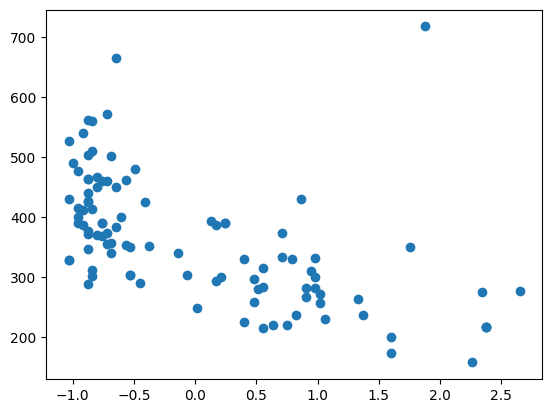

In [232]:
plt.scatter(XNorm3,th)

In [211]:
xnORM=np.array([XNorm0,XNorm1,XNorm2,XNorm3])

In [234]:
XNorm3

array([ 1.02191098,  0.98312878, -0.83963464,  0.12992037, -0.91719904,
       -0.95598124,  1.06069319, -0.83963464,  0.16870257,  1.8751194 ,
        1.60364399, -0.83963464, -0.80085244, -0.72328804, -0.91719904,
        0.98312878, -0.83963464, -0.60694144, -0.80085244,  0.20748477,
       -0.68450584, -0.14155503, -0.95598124, -0.72328804,  1.33216859,
       -0.06399063,  0.47896018,  0.63408898, -0.99476344,  2.379288  ,
       -0.76207024,  0.51774238, -1.03354564,  1.37095079, -0.87841684,
       -0.80085244, -0.72328804,  0.71165338, -0.76207024,  2.2629414 ,
       -0.41303044,  0.24626697,  2.65076341,  2.379288  , -0.87841684,
       -0.87841684, -1.03354564, -0.87841684,  0.75043558, -0.68450584,
       -0.95598124,  0.71165338, -0.87841684, -0.45181264, -0.56815924,
       -0.95598124, -0.56815924,  1.75877279, -0.76207024,  0.82799998,
       -0.87841684,  0.90556438,  0.01357377, -0.52937704,  0.98312878,
       -0.37424824,  0.94434658,  2.379288  , -0.64572364,  0.78

In [212]:
xnORM

array([[-1.12018542, -0.41174475,  1.29385043,  0.75524143,  1.32296443,
        -0.24191308, -1.33368809,  1.02454593, -0.94064908,  4.31928028,
        -1.51807676, -0.51849608,  0.34764542,  0.03952226, -0.46997275,
        -0.78052208, -1.37250675,  0.65091626,  0.85956659, -0.90668275,
         0.57813126, -0.79022675, -0.23706075,  0.43498742, -1.07166209,
        -0.76839125, -0.99402475, -1.23664142,  0.68003026, -0.82661925,
         0.01283442, -0.60583808,  1.26473643, -0.47967741,  2.59184961,
        -0.51849608,  1.0342506 ,  1.06093843,  0.59754059, -0.77081742,
         0.87654976,  1.49522227,  0.89838526, -0.82661925,  0.33551459,
         1.30840743, -0.46026808,  0.49078926, -1.45014409, -0.15699725,
         0.38161176,  0.17538759,  0.22391092, -0.76839125,  0.84986193,
        -0.49908675,  0.13656892,  0.85956659,  0.58298359, -0.93337058,
        -0.71258942, -0.63980442, -1.45014409, -0.90668275, -0.05267208,
         0.45924909, -0.48210358, -0.82661925,  2.8

In [256]:
w=[0.,0.,0.,0.,0.]
iteraciones = 10000
alph=1e-5
wf, cost=graddec(xnORM,th,w, alph, iteraciones, L,D)
wf

[-40.399438160715604,
 74.57856808517967,
 -4.50471081626983,
 -9.802410978450292,
 -40.399438160715604]

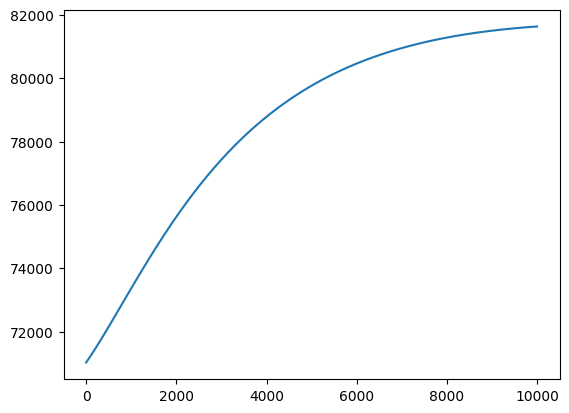

In [257]:
#Gráfica costo
plt.plot(range(iteraciones),cost)

In [249]:
tPred = wf[0] + wf[1]*xnORM[0,:] + wf[2]*xnORM[1,:] + wf[3]*xnORM[2,:]+wf[4]*xnORM[3,:]

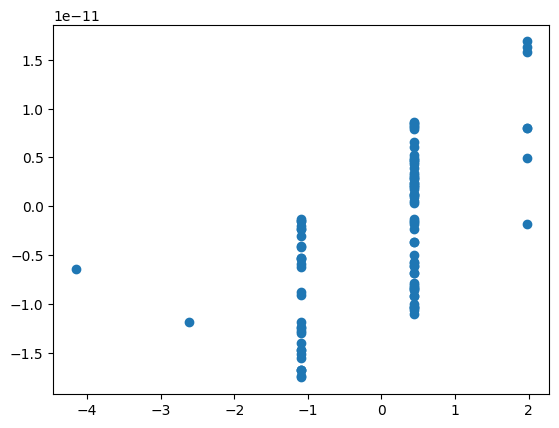

In [258]:
plt.scatter(xnORM[1,:],tPred)

In [ ]:
#PArte 4
YH=